In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import seed, gauss, sample
from sklearn.preprocessing import StandardScaler


C:\Users\Ionatan\AppData\Local\Temp\ipykernel_8092\1759644471.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  d = sample(dist.keys(), 1)[0]


<AxesSubplot:xlabel='x', ylabel='y'>

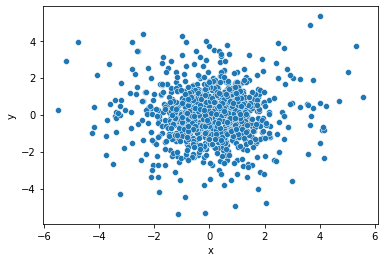

In [9]:
# Nos generamos un dataset con claros clusters

# Seteamos los parámetros de las 3 distribuciones

dist_1 = {
  "dist1" : {
      "mean" : [4,4], # Probar con 5 5 tambien
      "sd" : [2,2],
  },
  "dist2" : {
      "mean" : [0,0],
      "sd" : [0.5,0.5],
  },
  "dist3" : {
      "mean" : [-5,-5],
      "sd" : [1,1],
  }
}


dist= {
  "dist1" : {
      "mean" : [0,0],
      "sd" : [1,1],
  },
  "dist2" : {
      "mean" : [0,0],
      "sd" : [1,1],
  },
  "dist3" : {
      "mean" : [0,0],
      "sd" : [2,2],
  }
}

# Generamos los datos aleatorios, primero escogemos al azar una de las 3 
# distribuciones y luego generamos la observación con los parámetros de 
# dicha distribución.
x = []
y = []
tipo = []
for i in range(1000):
    d = sample(dist.keys(), 1)[0]
    x.append(gauss(dist[d]["mean"][0], dist[d]["sd"][0]))
    y.append(gauss(dist[d]["mean"][1], dist[d]["sd"][1]))

df = pd.DataFrame({
    "x" : x,
    "y" : y,
})
# Agregamos una columna numerada
numerar = True
escala = 0.0001
if numerar:
    df['index1'] = df.index*escala
escalar = False
if escalar:
    scaler=StandardScaler()
    df=scaler.fit_transform(df)
    if numerar:
        df = pd.DataFrame(df, columns = ['x','y','index1'])
    else:
        df = pd.DataFrame(df, columns = ['x','y'])
sns.scatterplot(data = df, x = "x", y = "y")

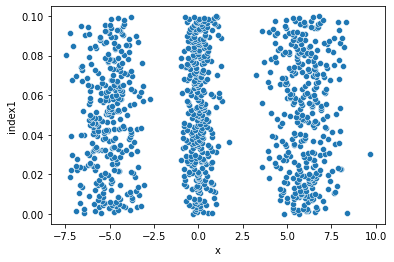

In [33]:
g = sns.scatterplot(data = df, x = "x", y = "index1")
#g.set_aspect("equal")

In [6]:
df

,x,y
0,4.441617,3.327665
1,0.042228,0.075808
2,4.747104,3.437204
3,-7.589321,-2.115083
4,-3.873806,-4.760204
...,...,...
995,-7.791088,-5.535122
996,1.585256,-1.886514
997,3.923170,4.763931
998,2.874079,3.639955


<AxesSubplot:xlabel='x', ylabel='y'>

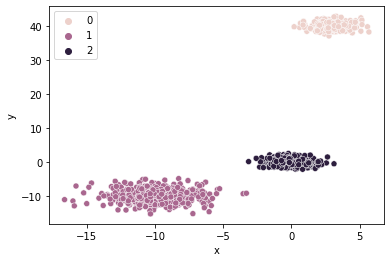

In [7]:
# Probamos como da un Kmeans con diferentes cantidades de clusters
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3,n_init=10) # Numero de repeticiones=10  #,random_state=0 # Con n=6 a veces hace una cosa a veces otra
kmeans.fit(df)
labels = kmeans.labels_ 

sns.scatterplot(data = df, x = "x", y = "y", hue=labels)


<AxesSubplot:xlabel='y', ylabel='index1'>

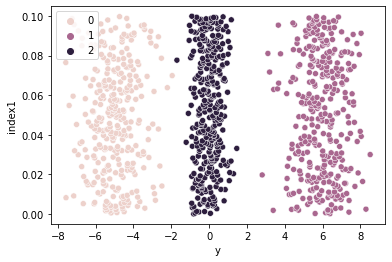

In [35]:
sns.scatterplot(data = df, x = "y", y = "index1", hue=labels)

[Text(0, 0.5, 'Calinski-Harabasz')]

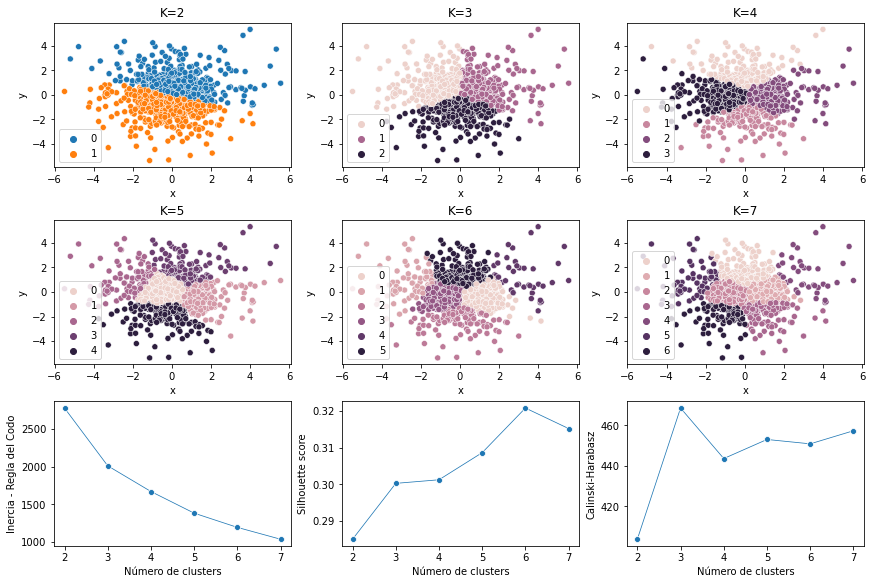

In [10]:
# Vamos a ver la regla del codo y el coeficiente de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

fig, axs = plt.subplots(3, 3,figsize=(12,8),constrained_layout=True)
ax_i = axs.ravel()

n_max = 7
k_values = list(range(2,n_max+1))
assert len(ax_i) == len(k_values)+3, "Las dimenciones de la cuadricula de los graficos no coincide con la cantidad de graficos a calcular"

sq_distances=[]
sil=[]
ch_scores=[]
for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10) # Numero de repeticiones=10
    kmeans.fit(df)
    sq_distances.append(kmeans.inertia_)
    labels = kmeans.labels_ 
    score=silhouette_score(df,kmeans.labels_)
    sil.append(score)
    score=calinski_harabasz_score(df,kmeans.labels_)
    ch_scores.append(score)

    sns.scatterplot(data = df, x = "x", y = "y", hue=labels, ax=ax_i[k-2]).set(title='K='+str(k))

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False, ax=ax_i[-3])
plt.setp(ax_i[-3], xlabel='Número de clusters')
plt.setp(ax_i[-3], ylabel='Inercia - Regla del Codo')

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False, ax=ax_i[-2])
plt.setp(ax_i[-2], xlabel='Número de clusters')
plt.setp(ax_i[-2], ylabel='Silhouette score')

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False, ax=ax_i[-1])
plt.setp(ax_i[-1], xlabel='Número de clusters')
plt.setp(ax_i[-1], ylabel='Calinski-Harabasz')

# Ver que pasa cuando se cambia las sd del cluster de abajo.
# Ver que pasa cuando se agrega un cluster extra
# Ver que pasa con una columna que no clusteree